# Data Collection

Install paket

In [190]:
pip install scikit-surprise

Import libraries

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from surprise import accuracy
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy


%matplotlib inline

Download dataset from drive

In [192]:
!gdown --id "1mTkXgKvDM5_JSNpt5PxvgS3rUr9U1B86"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mTkXgKvDM5_JSNpt5PxvgS3rUr9U1B86
To: /content/HBO_Content.csv
100% 212k/212k [00:00<00:00, 69.7MB/s]


Read Data

In [193]:
df = pd.read_csv("/content/HBO_Content.csv")
df.head()

index            title type  year   rating  imdb_score  rotten_score  \
0      0  Game of Thrones   TV  2011  R/TV-MA         9.3          89.0   
1      1       Fight Club  NaN  1999  R/TV-MA         8.8          79.0   
2      2            Alien  NaN  1979  R/TV-MA         8.4          94.0   
3      3        Chernobyl   TV  2019  R/TV-MA         9.4          96.0   
4      4         Die Hard  NaN  1988  R/TV-MA         8.2          93.0   

      decade imdb_bucket  genres_Action_Adventure  ...  platforms_hbo_max  \
0  2010-2019   9.01-9.50                        1  ...                  1   
1  1990-1999   8.51-9.00                        0  ...                  1   
2  1970-1979   8.01-8.50                        0  ...                  1   
3  2010-2019   9.01-9.50                        0  ...                  1   
4  1980-1989   8.01-8.50                        1  ...                  1   

   platforms_hoopla  platforms_hulu_plus  platforms_kanopy  platforms_netflix  \
0                 0                    0                 0                  0   
1                 0                    0                 0                  0   
2                 0                    0                 0                  0   
3                 0                    0                 0                  0   
4                 0                    0                 0                  0   

   platforms_shoutfactorytv  platforms_sundancenow  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   

   platforms_syfy_tveverywhere  platforms_tlc_go  platforms_viceland_tve  
0                            0                 0                       0  
1                            0                 0                       0  
2                            0                 0                       0  
3                            0                 0                       0  
4                            0                 0                       0  

[5 rows x 53 columns]

# Data Understanding

Informasi bentuk dataset

In [194]:
df.shape

(1386, 53)

Informasi dataset

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        1386 non-null   int64  
 1   title                        1386 non-null   object 
 2   type                         229 non-null    object 
 3   year                         1386 non-null   int64  
 4   rating                       1089 non-null   object 
 5   imdb_score                   1326 non-null   float64
 6   rotten_score                 798 non-null    float64
 7   decade                       1386 non-null   object 
 8   imdb_bucket                  1326 non-null   object 
 9   genres_Action_Adventure      1386 non-null   int64  
 10  genres_Animation             1386 non-null   int64  
 11  genres_Biography             1386 non-null   int64  
 12  genres_Children              1386 non-null   int64  
 13  genres_Comedy     

Informasi statistik deskriptif dataset

In [196]:
df.describe()

index         year   imdb_score  rotten_score  \
count  1386.000000  1386.000000  1326.000000     798.00000   
mean    692.500000  2008.082251     6.793514      67.72807   
std     400.248048    10.705329     1.099634      27.22991   
min       0.000000  1960.000000     1.700000       3.00000   
25%     346.250000  2002.000000     6.200000      48.00000   
50%     692.500000  2011.000000     6.900000      76.00000   
75%    1038.750000  2017.000000     7.500000      90.00000   
max    1385.000000  2020.000000     9.900000     100.00000   

       genres_Action_Adventure  genres_Animation  genres_Biography  \
count              1386.000000       1386.000000       1386.000000   
mean                  0.178932          0.044733          0.082251   
std                   0.383434          0.206792          0.274846   
min                   0.000000          0.000000          0.000000   
25%                   0.000000          0.000000          0.000000   
50%                   0.000000          0.000000          0.000000   
75%                   0.000000          0.000000          0.000000   
max                   1.000000          1.000000          1.000000   

       genres_Children  genres_Comedy  genres_Crime  ...  platforms_hbo_max  \
count      1386.000000    1386.000000   1386.000000  ...        1386.000000   
mean          0.015873       0.348485      0.135642  ...           0.866522   
std           0.125029       0.476662      0.342532  ...           0.340213   
min           0.000000       0.000000      0.000000  ...           0.000000   
25%           0.000000       0.000000      0.000000  ...           1.000000   
50%           0.000000       0.000000      0.000000  ...           1.000000   
75%           0.000000       1.000000      0.000000  ...           1.000000   
max           1.000000       1.000000      1.000000  ...           1.000000   

       platforms_hoopla  platforms_hulu_plus  platforms_kanopy  \
count       1386.000000          1386.000000       1386.000000   
mean           0.038240             0.009380          0.006494   
std            0.191843             0.096427          0.080349   
min            0.000000             0.000000          0.000000   
25%            0.000000             0.000000          0.000000   
50%            0.000000             0.000000          0.000000   
75%            0.000000             0.000000          0.000000   
max            1.000000             1.000000          1.000000   

       platforms_netflix  platforms_shoutfactorytv  platforms_sundancenow  \
count        1386.000000               1386.000000            1386.000000   
mean            0.000722                  0.004329               0.000722   
std             0.026861                  0.065676               0.026861   
min             0.000000                  0.000000               0.000000   
25%             0.000000                  0.000000               0.000000   
50%             0.000000                  0.000000               0.000000   
75%             0.000000                  0.000000               0.000000   
max             1.000000                  1.000000               1.000000   

       platforms_syfy_tveverywhere  platforms_tlc_go  platforms_viceland_tve  
count                  1386.000000       1386.000000             1386.000000  
mean                      0.000722          0.000722                0.000722  
std                       0.026861          0.026861                0.026861  
min                       0.000000          0.000000                0.000000  
25%                       0.000000          0.000000                0.000000  
50%                       0.000000          0.000000                0.000000  
75%                       0.000000          0.000000                0.000000  
max                       1.000000          1.000000                1.000000  

[8 rows x 48 columns]

Cek missing value

In [197]:
df.isnull().sum()

index                             0
title                             0
type                           1157
year                              0
rating                          297
imdb_score                       60
rotten_score                    588
decade                            0
imdb_bucket                      60
genres_Action_Adventure           0
genres_Animation                  0
genres_Biography                  0
genres_Children                   0
genres_Comedy                     0
genres_Crime                      0
genres_Cult                       0
genres_Documentary                0
genres_Drama                      0
genres_Family                     0
genres_Fantasy                    0
genres_Food                       0
genres_Game Show                  0
genres_History                    0
genres_Horror                     0
genres_Independent                0
genres_LGBTQ                      0
genres_Musical                    0
genres_Mystery              

Cek outlier

In [198]:
# Statistical Method: Z-score
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print("Outliers detected using Z-score method:")
print(df[outliers])

Outliers detected using Z-score method:
Empty DataFrame
Columns: [index, title, type, year, rating, imdb_score, rotten_score, decade, imdb_bucket, genres_Action_Adventure, genres_Animation, genres_Biography, genres_Children, genres_Comedy, genres_Crime, genres_Cult, genres_Documentary, genres_Drama, genres_Family, genres_Fantasy, genres_Food, genres_Game Show, genres_History, genres_Horror, genres_Independent, genres_LGBTQ, genres_Musical, genres_Mystery, genres_Reality, genres_Romance, genres_Science_Fiction, genres_Sport, genres_Stand_up_Talk, genres_Thriller, genres_Travel, platforms_acorntv, platforms_amazon_prime, platforms_cinemax, platforms_epix, platforms_fandor, platforms_free, platforms_fubo_tv, platforms_hbo, platforms_hbo_max, platforms_hoopla, platforms_hulu_plus, platforms_kanopy, platforms_netflix, platforms_shoutfactorytv, platforms_sundancenow, platforms_syfy_tveverywhere, platforms_tlc_go, platforms_viceland_tve]
Index: []

[0 rows x 53 columns]


In [199]:
# Mendeteksi outlier dengan Z-score
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Menampilkan data yang terdeteksi sebagai outlier
print("Outliers detected using Z-score method:")
print(df[outliers])

Outliers detected using Z-score method:
Empty DataFrame
Columns: [index, title, type, year, rating, imdb_score, rotten_score, decade, imdb_bucket, genres_Action_Adventure, genres_Animation, genres_Biography, genres_Children, genres_Comedy, genres_Crime, genres_Cult, genres_Documentary, genres_Drama, genres_Family, genres_Fantasy, genres_Food, genres_Game Show, genres_History, genres_Horror, genres_Independent, genres_LGBTQ, genres_Musical, genres_Mystery, genres_Reality, genres_Romance, genres_Science_Fiction, genres_Sport, genres_Stand_up_Talk, genres_Thriller, genres_Travel, platforms_acorntv, platforms_amazon_prime, platforms_cinemax, platforms_epix, platforms_fandor, platforms_free, platforms_fubo_tv, platforms_hbo, platforms_hbo_max, platforms_hoopla, platforms_hulu_plus, platforms_kanopy, platforms_netflix, platforms_shoutfactorytv, platforms_sundancenow, platforms_syfy_tveverywhere, platforms_tlc_go, platforms_viceland_tve]
Index: []

[0 rows x 53 columns]


Visualisasikan outlier dengan boxplot

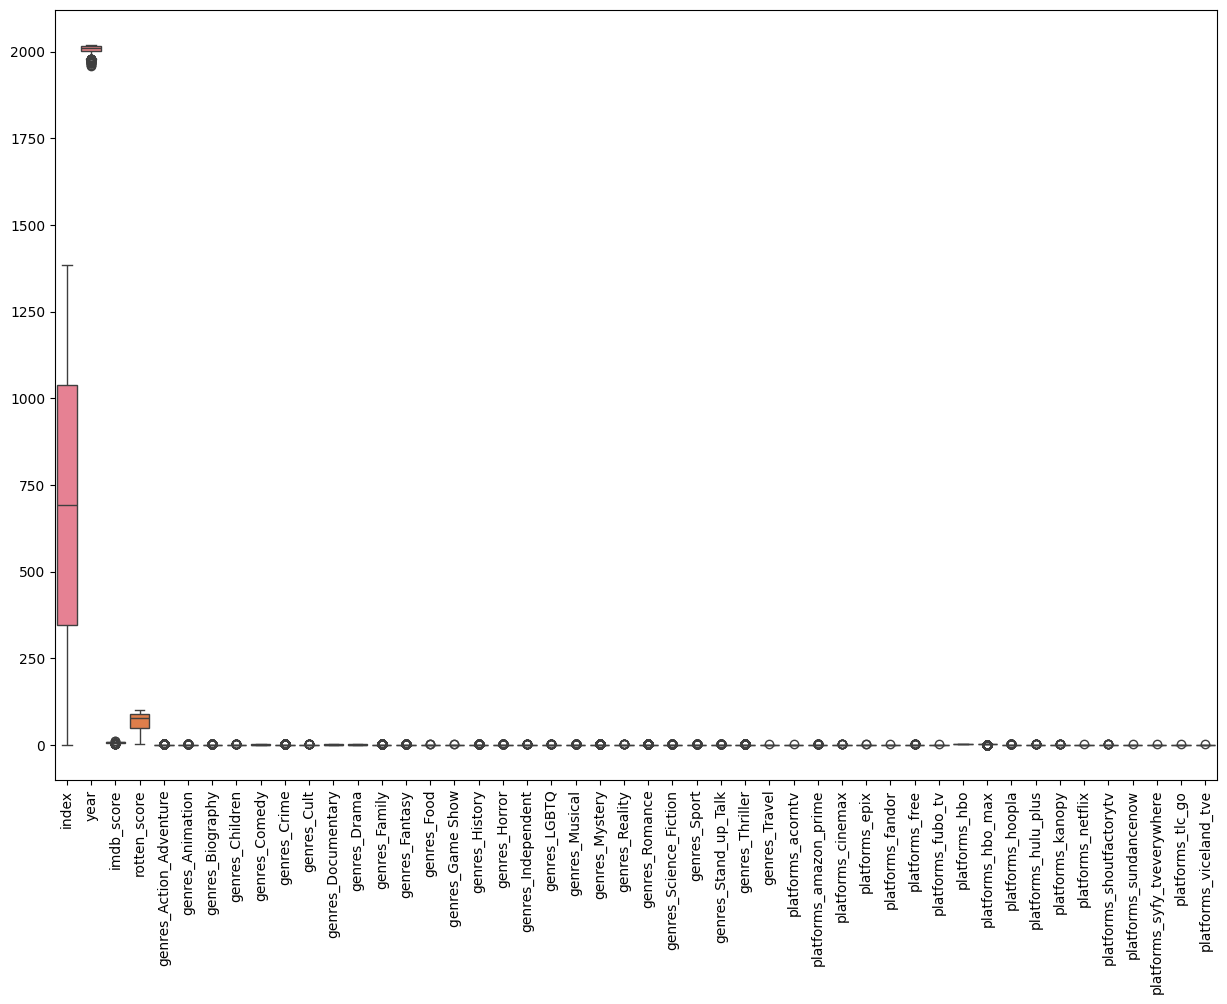

In [200]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Data Preparation

Handling missing value dengan mengisi missing value dengan mode dan rata-rata

In [201]:
# Mengisi nilai yang hilang dengan mode untuk kolom 'type' dan 'rating'
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Mengisi nilai yang hilang dengan rata-rata untuk kolom 'imdb_score' dan 'rotten_score'
df['imdb_score'].fillna(df['imdb_score'].mean(), inplace=True)
df['rotten_score'].fillna(df['rotten_score'].mean(), inplace=True)

# Mengisi nilai yang hilang dengan mode untuk kolom 'imdb_bucket'
df['imdb_bucket'].fillna(df['imdb_bucket'].mode()[0], inplace=True)

# Menampilkan jumlah nilai yang hilang setelah pengisian
print("Jumlah nilai yang hilang setelah pengisian:")
print(df.isnull().sum())

Jumlah nilai yang hilang setelah pengisian:
index                          0
title                          0
type                           0
year                           0
rating                         0
imdb_score                     0
rotten_score                   0
decade                         0
imdb_bucket                    0
genres_Action_Adventure        0
genres_Animation               0
genres_Biography               0
genres_Children                0
genres_Comedy                  0
genres_Crime                   0
genres_Cult                    0
genres_Documentary             0
genres_Drama                   0
genres_Family                  0
genres_Fantasy                 0
genres_Food                    0
genres_Game Show               0
genres_History                 0
genres_Horror                  0
genres_Independent             0
genres_LGBTQ                   0
genres_Musical                 0
genres_Mystery                 0
genres_Reality                 0

Mengambil genre sebagai fitur untuk content based filtering

In [202]:
# Gabungkan kolom genre menjadi satu kolom teks
genres_list = df.columns[9:35].tolist()  # Kolom-kolom genre dari dataset
df['genres_combined'] = df[genres_list].apply(lambda x: ' '.join(x.index[x]), axis=1)

genres_list

['genres_Action_Adventure',
 'genres_Animation',
 'genres_Biography',
 'genres_Children',
 'genres_Comedy',
 'genres_Crime',
 'genres_Cult',
 'genres_Documentary',
 'genres_Drama',
 'genres_Family',
 'genres_Fantasy',
 'genres_Food',
 'genres_Game Show',
 'genres_History',
 'genres_Horror',
 'genres_Independent',
 'genres_LGBTQ',
 'genres_Musical',
 'genres_Mystery',
 'genres_Reality',
 'genres_Romance',
 'genres_Science_Fiction',
 'genres_Sport',
 'genres_Stand_up_Talk',
 'genres_Thriller',
 'genres_Travel']

Menggabungkan kolom genre menjadi 1 kolom teks

In [203]:
# Gabungkan kolom genre menjadi satu kolom teks
df['genres_combined'] = df[genres_list].apply(lambda x: ' '.join(x.index[x]), axis=1)

Inisiasi reader

In [204]:
# Inisialisasi pembaca untuk dataset
reader = Reader(rating_scale=(1, 10))

# Load dataset dari dataframe
data = Dataset.load_from_df(df[['index', 'title', 'imdb_score']], reader)

Membagi menjadi train dan test set

In [205]:
# Split data menjadi train dan test set
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Modeling

## Content Based Filtering

Membuat TF-IDF vectorizer

In [206]:
# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Hitung TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['genres_combined'])

In [207]:
# Hitung cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Membuat cosine matrix

In [208]:
# Hitung cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat dataframe dari similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])

Buat fungsi untuk rekomendasi

In [209]:
# Fungsi untuk mendapatkan rekomendasi
def get_recommendations(title, similarity_df=cosine_sim_df):
    if title not in similarity_df.index:
        return "Title not found in the dataset."

    # Cosine similarity recommendations
    sim_scores_cosine = similarity_df[title].sort_values(ascending=False)
    sim_scores_cosine = sim_scores_cosine.iloc[1:11]  # Ambil 10 item paling mirip

    return sim_scores_cosine

Menampilkan top 10 rekomendasi

In [210]:
known_title = 'Game of Thrones'
cosine_recommendations = get_recommendations(known_title)

print(f"Rekomendasi Cosine Similarity untuk '{known_title}':")
print(cosine_recommendations.head(10))  # Ambil 10 item teratas dari cosine recommendations


Rekomendasi Cosine Similarity untuk 'Game of Thrones':
title
Match Point            1.0
Carnivàle              1.0
Glass                  1.0
Ma                     1.0
The Recruit            1.0
Pandorum               1.0
The Mighty Ducks       1.0
Galveston              1.0
Teeth                  1.0
Walking and Talking    1.0
Name: Game of Thrones, dtype: float64


##  Collaborative Filtering

Inisiasi model collaborative filtering

In [211]:
# Inisialisasi model Collaborative Filtering (SVD)
model = SVD()

# Latih model menggunakan train set
model.fit(trainset)

# Prediksi untuk test set
predictions = model.test(testset)

Menampilkan top 10 rekomendasi

In [212]:
# Fungsi untuk mengurutkan prediksi berdasarkan nilai prediksi (est)
def get_top_n(predictions, n=10):
    # Urutkan prediksi berdasarkan nilai prediksi (est)
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    return top_n

# Contoh menggunakan fungsi untuk mendapatkan top-10 prediksi
top_predictions = get_top_n(predictions, n=10)

# Tampilkan hasilnya
for i, pred in enumerate(top_predictions):
    print(f'{i+1}: {pred.uid} --> {pred.iid} (Prediction: {pred.est})')

1: 492 --> Atlanta's Missing and Murdered: The Lost Children (Prediction: 6.8845497662793615)
2: 87 --> The Manchurian Candidate (Prediction: 6.835720545527366)
3: 749 --> Empire Falls (Prediction: 6.828049334109095)
4: 751 --> Empire Falls (Prediction: 6.828049334109095)
5: 748 --> Empire Falls (Prediction: 6.828049334109095)
6: 1300 --> Episode #1.1 (Prediction: 6.8035034355273)
7: 1069 --> Slipping Into Darkness (Prediction: 6.7926734676097595)
8: 476 --> Harsh Times (Prediction: 6.7926734676097595)
9: 157 --> Rio (Prediction: 6.7926734676097595)
10: 1072 --> Toxic Hot Seat (Prediction: 6.7926734676097595)


# Evaluasi

## Evaluasi pada Content Based Filtering

Menghitung Precision dan Recall pada top-k prediksi untuk setiap pengguna

In [213]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    # Menginisialisasi dictionary untuk menghitung TP, FP, FN
    tp = defaultdict(int)
    fp = defaultdict(int)
    fn = defaultdict(int)

    for uid, _, true_r, est, _ in predictions:
        if est >= threshold:
            if true_r >= threshold:
                tp[uid] += 1
            else:
                fp[uid] += 1
        else:
            if true_r >= threshold:
                fn[uid] += 1

    precision = dict()
    recall = dict()
    for uid in tp:
        precision[uid] = tp[uid] / (tp[uid] + fp[uid]) if (tp[uid] + fp[uid]) > 0 else 0
        recall[uid] = tp[uid] / (tp[uid] + fn[uid]) if (tp[uid] + fn[uid]) > 0 else 0

    precision_avg = sum(precision.values()) / len(precision)
    recall_avg = sum(recall.values()) / len(recall)

    return precision_avg, recall_avg


Menghitung MAP untuk evaluasi kinerja model

In [214]:
def mean_average_precision(predictions, k=10, threshold=3.5):
    average_precision = 0
    total_users = len(set([uid for uid, _, _, _, _ in predictions]))

    for uid in set([uid for uid, _, _, _, _ in predictions]):
        relevant_items = [(true_r >= threshold) for _, _, true_r, _, _ in predictions if uid == uid]
        precision_at_k = sum(relevant_items[:k]) / k if relevant_items else 0
        average_precision += precision_at_k

    mean_avg_precision = average_precision / total_users

    return mean_avg_precision

Menampilkan hasil evaluasi

In [215]:
# Evaluasi model berbasis cosine similarity
predictions = model.test(testset)

precision_avg, recall_avg = precision_recall_at_k(predictions)
map_score = mean_average_precision(predictions)

print(f"Precision at K: {precision_avg:.4f}")
print(f"Recall at K: {recall_avg:.4f}")
print(f"Mean Average Precision (MAP): {map_score:.4f}")


Precision at K: 1.0000
Recall at K: 1.0000
Mean Average Precision (MAP): 1.0000


## Evaluasi pada Collaborative Filtering

Prediksi untuk test set

In [216]:
# Prediksi untuk test set
predictions = model.test(testset)

Menghitung RMSE

In [217]:
# Evaluasi model dengan RMSE
rmse = accuracy.rmse(predictions)

RMSE: 1.0404


Menghitung MAE

In [218]:
# Evaluasi menggunakan MAE
mae = accuracy.mae(predictions)

MAE:  0.8011


Menghitung precision dan recall

In [219]:
# Menghitung precision dan recall
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=7):
    """Compute precision and recall at k for each user."""
    tp = defaultdict(int)  # true positives
    fp = defaultdict(int)  # false positives
    fn = defaultdict(int)  # false negatives

    for uid, _, true_r, est, _ in predictions:
        if est >= threshold:
            if true_r >= threshold:
                tp[uid] += 1
            else:
                fp[uid] += 1
        else:
            if true_r >= threshold:
                fn[uid] += 1

    precision = defaultdict(float)
    recall = defaultdict(float)

    for uid in tp.keys():
        if (tp[uid] + fp[uid]) > 0:
            precision[uid] = tp[uid] / (tp[uid] + fp[uid])
        else:
            precision[uid] = 0

        if (tp[uid] + fn[uid]) > 0:
            recall[uid] = tp[uid] / (tp[uid] + fn[uid])
        else:
            recall[uid] = 0

    precision_avg = sum(precision.values()) / len(precision) if len(precision) > 0 else 0
    recall_avg = sum(recall.values()) / len(recall) if len(recall) > 0 else 0

    return precision_avg, recall_avg


Menampilkan hasil evaluasi

In [220]:
precision_avg, recall_avg = precision_recall_at_k(predictions)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision at K: {precision_avg:.4f}")
print(f"Recall at K: {recall_avg:.4f}")

RMSE: 1.0404
MAE: 0.8011
Precision at K: 0.0000
Recall at K: 0.0000
